In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import confusion_matrix
from tensorflow import keras

C:\Users\heide\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
print(tf.__version__)

2.13.0-rc1


In [3]:
keras.utils.set_random_seed(812)

In [4]:
path = 'C:\\Users\\heide\\Documents\\HSLU\\Data_axial\\Training'

In [5]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    labels = 'inferred',
    label_mode = 'int',
    validation_split=0.2,
    subset="training",
    seed = 123,
    batch_size = BATCH_SIZE,
    image_size = IMG_SIZE) 
    #crop_to_aspect_ratio = TRUE

Found 1078 files belonging to 4 classes.
Using 863 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    labels = 'inferred',
    label_mode = 'int',
    validation_split=0.2,
    subset="validation",
    seed=123,
    batch_size = BATCH_SIZE,
    image_size = IMG_SIZE)

Found 1078 files belonging to 4 classes.
Using 215 files for validation.


In [8]:
class_names = train_ds.class_names

In [9]:
print(class_names)

['glioma_axial', 'meningioma_axial', 'no_tumor_axial', 'pituitary_axial']


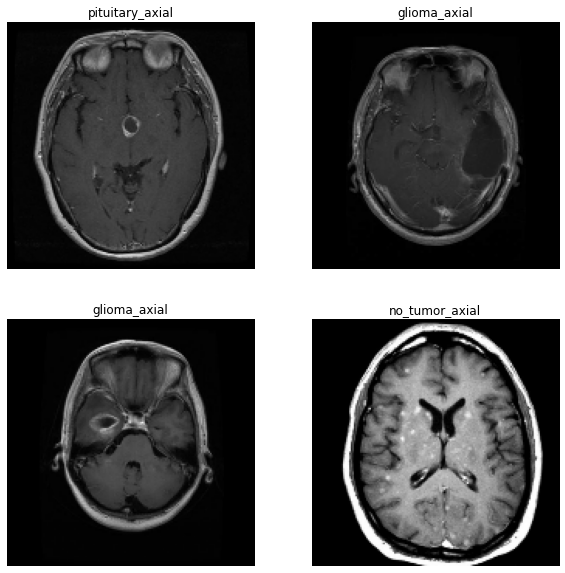

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

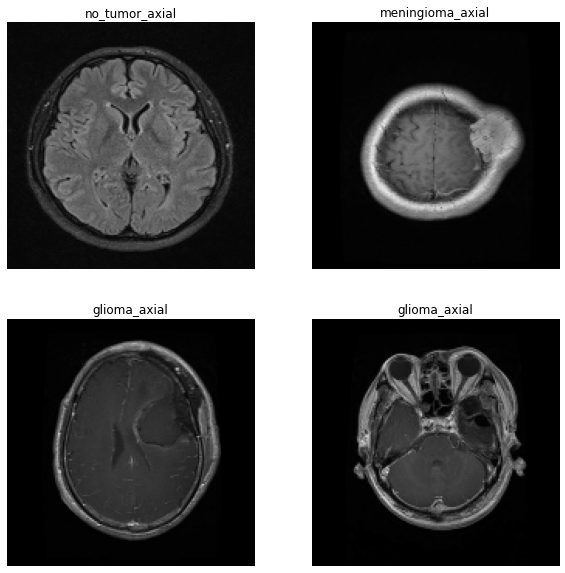

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
num_classes = 4

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [13]:
#model.compile(
#  optimizer='adam',
#  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#  metrics=['accuracy', 'Precision', 'Recall'])

In [14]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [15]:
history = model.fit(train_ds, validation_data=val_ds, epochs=12)

Epoch 1/12
27/27 [==============================] - 10s 336ms/step - loss: 12.5033 - accuracy: 0.5620 - val_loss: 0.8283 - val_accuracy: 0.6698
Epoch 2/12
27/27 [==============================] - 9s 325ms/step - loss: 0.5438 - accuracy: 0.8042 - val_loss: 0.7024 - val_accuracy: 0.7767
Epoch 3/12
27/27 [==============================] - 9s 329ms/step - loss: 0.2956 - accuracy: 0.9073 - val_loss: 0.5813 - val_accuracy: 0.7953
Epoch 4/12
27/27 [==============================] - 9s 325ms/step - loss: 0.1798 - accuracy: 0.9397 - val_loss: 0.5812 - val_accuracy: 0.8093
Epoch 5/12
27/27 [==============================] - 9s 323ms/step - loss: 0.1053 - accuracy: 0.9733 - val_loss: 0.5939 - val_accuracy: 0.8326
Epoch 6/12
27/27 [==============================] - 9s 327ms/step - loss: 0.0551 - accuracy: 0.9884 - val_loss: 0.6157 - val_accuracy: 0.8837
Epoch 7/12
27/27 [==============================] - 9s 328ms/step - loss: 0.0276 - accuracy: 0.9942 - val_loss: 0.6490 - val_accuracy: 0.8512
Epoc

In [16]:
#checkpoint = tf.keras.callbacks.ModelCheckpoint('my_model.keras', save_best_only=True)
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#model.fit(train_ds, validation_data=val_ds, callbacks=[callback, checkpoint])

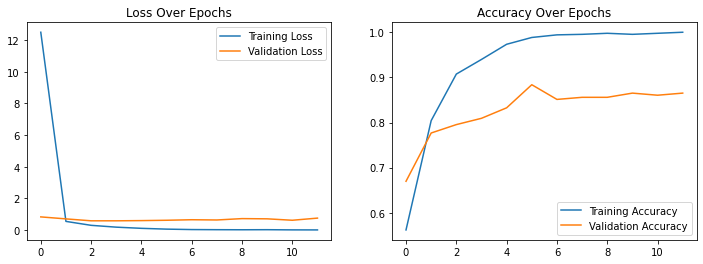

In [17]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
#plt.xticks(range(len(history.history['loss'])))
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

#plt.xticks(range(len(history.history['accuracy'])))

plt.show()

In [18]:
predictions = model.predict(train_ds)

27/27 [==============================] - 2s 82ms/step


In [19]:
print(predictions)

[[-10.714986    15.8173685    2.3724363    2.5800114 ]
 [ 13.484851     3.3205068  -13.333588    -7.2077603 ]
 [  0.91074646  11.559571    -6.0475535    4.9210944 ]
 ...
 [-26.652554    10.669842    21.042307     5.275114  ]
 [  1.4686034    6.5950766   -6.6222897   -5.3242116 ]
 [  8.596197     1.3709017  -10.187568    -6.547472  ]]


In [20]:
type(predictions)

numpy.ndarray

In [21]:
predicted_categories = tf.argmax(predictions, axis=1)

In [22]:
type(predicted_categories)

tensorflow.python.framework.ops.EagerTensor

In [23]:
true_categories = tf.concat([y for x, y in train_ds], axis=0)

In [24]:
type(true_categories)

tensorflow.python.framework.ops.EagerTensor

In [25]:
conf_matrix = confusion_matrix(predicted_categories, true_categories)

In [26]:
conf_matrix

array([[62, 31, 58, 61],
       [49, 71, 53, 50],
       [52, 56, 56, 50],
       [49, 65, 47, 53]], dtype=int64)

Text(0.5, 60.0, 'Predicted')

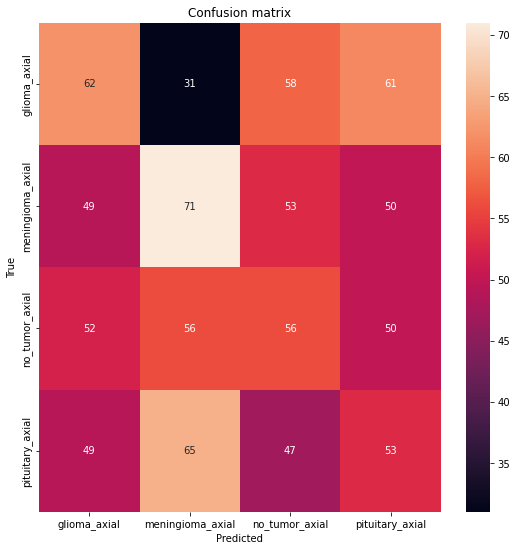

In [27]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
sns.heatmap(conf_matrix, annot=True,fmt='.0f')
plt.title('Confusion matrix')
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)
plt.ylabel('True')
plt.xlabel('Predicted')